# Decision Trees in Python

Based on tutorial at https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/.

This notebook just contains some code and some commentary, not the full explanations of the course.


In [28]:
""" Import libraries """

import numpy as np
import pandas as pd

from sklearn import tree
from sklearn.datasets import load_iris, load_boston
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.utils import check_random_state
from sklearn.tree import _tree

from sklearn.tree import export_graphviz
import os

In [11]:
""" As always, we'll play with the Iris dataset """

data = load_iris()
print(data['data'], data['target'])


[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

In [13]:
""" Load up and fit a decision tree with default settings """

model = tree.DecisionTreeClassifier(criterion='entropy')
# for classification, here you can change the algorithm as gini or entropy (information gain) by default it is gini 

model.fit(data['data'], data['target'])

print(model.score(data['data'], data['target']))

print(model)

1.0
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [15]:
""" This time I'm going full-hog
    and splitting to training and testing data """
x_train, x_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=0.4, random_state=0)

# Fit to training data
model.fit(x_train, y_train)

# Test your fitted model
print(model.score(x_test, y_test))

0.95


In [16]:
""" And using cross-validation """

scores = cross_val_score(model, data['data'], data['target'], cv=5)


# And a nice snippet to give a formatted report of mean score and 95% CI
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.96 (+/- 0.07)


# Implementing Random Forests in Python

In this case, I've not tried to hold back data for testing.  I'm not doing so because I'm not certain if such a method is required when dealing with a model that through sampling-with-replacement naturally tests and aggregates all possible combinations.

In [20]:
# Load and split data
data = load_iris()

# Create and fit model
model= RandomForestClassifier(n_estimators=1000, criterion="entropy")

model.fit(data['data'], data['target'])

print(model.score(data['data'], data['target']))

1.0


## Plotting your trees/ensembles - some code stolen from the internet

With effusive thanks to Aysen Tatarinov at https://aysent.github.io/2015/11/08/random-forest-leaf-visualization.html.  Just copy, paste and play!



In [43]:
def leaf_depths(tree, node_id = 0):
    
     '''
     tree.children_left and tree.children_right store ids
     of left and right chidren of a given node
     '''
     left_child = tree.children_left[node_id]
     right_child = tree.children_right[node_id]

     '''
     If a given node is terminal, 
     both left and right children are set to _tree.TREE_LEAF
     '''
     if left_child == _tree.TREE_LEAF:
         
         '''
         Set depth of terminal nodes to 0
         '''
         depths = np.array([0])

     else:
         
         '''
         Get depths of left and right children and
         increment them by 1
         '''
         left_depths = leaf_depths(tree, left_child) + 1
         right_depths = leaf_depths(tree, right_child) + 1
 
         depths = np.append(left_depths, right_depths)
 
     return depths

def leaf_samples(tree, node_id = 0):
    
     left_child = tree.children_left[node_id]
     right_child = tree.children_right[node_id]

     if left_child == _tree.TREE_LEAF:
        
         samples = np.array([tree.n_node_samples[node_id]])

     else:
        
         left_samples = leaf_samples(tree, left_child)
         right_samples = leaf_samples(tree, right_child)

         samples = np.append(left_samples, right_samples)

     return samples

def draw_tree(ensemble, tree_id=0):

     plt.figure(figsize=(8,8))
     plt.subplot(211)

     tree = ensemble.estimators_[tree_id].tree_

     depths = leaf_depths(tree)
     plt.hist(depths, histtype='step', color='#9933ff', 
              bins=range(min(depths), max(depths)+1))

     plt.xlabel("Depth of leaf nodes (tree %s)" % tree_id)
    
     plt.subplot(212)
    
     samples = leaf_samples(tree)
     plt.hist(samples, histtype='step', color='#3399ff', 
              bins=range(min(samples), max(samples)+1))
    
     plt.xlabel("Number of samples in leaf nodes (tree %s)" % tree_id)
   
     plt.show()
     
     return 0


    
def draw_ensemble(ensemble):

     plt.figure(figsize=(8,8))
     plt.subplot(211)

     depths_all = np.array([], dtype=int)

     for x in ensemble.estimators_:
         tree = x.tree_
         depths = leaf_depths(tree)
         depths_all = np.append(depths_all, depths)
         plt.hist(depths, histtype='step', color='#ddaaff', 
                  bins=range(min(depths), max(depths)+1))

     plt.hist(depths_all, histtype='step', color='#9933ff', 
              bins=range(min(depths_all), max(depths_all)+1), 
              weights=np.ones(len(depths_all))/len(ensemble.estimators_), 
              linewidth=2)
     plt.xlabel("Depth of leaf nodes")
    
     samples_all = np.array([], dtype=int)
    
     plt.subplot(212)
    
     for x in ensemble.estimators_:
         tree = x.tree_
         samples = leaf_samples(tree)
         samples_all = np.append(samples_all, samples)
         plt.hist(samples, histtype='step', color='#aaddff', 
                  bins=range(min(samples), max(samples)+1))
    
     plt.hist(samples_all, histtype='step', color='#3399ff', 
              bins=range(min(samples_all), max(samples_all)+1), 
              weights=np.ones(len(samples_all))/len(ensemble.estimators_), 
              linewidth=2)
     plt.xlabel("Number of samples in leaf nodes")
    
     plt.show()
    
     return 0

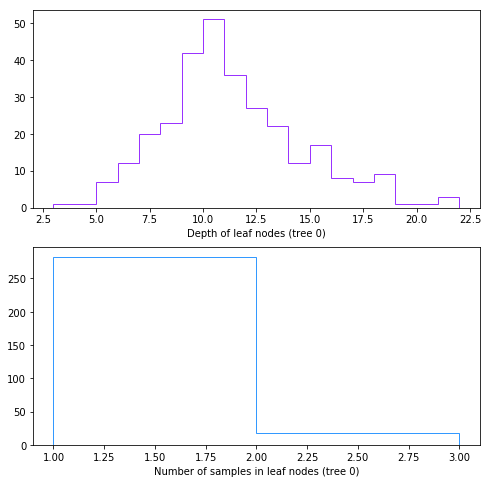

0

In [44]:
boston = load_boston()

X = boston.data
y = boston.target

rnd = check_random_state(0)

ensemble = RandomForestRegressor(n_estimators=100, random_state=rnd)

ensemble.fit(X, y)

draw_tree(ensemble)


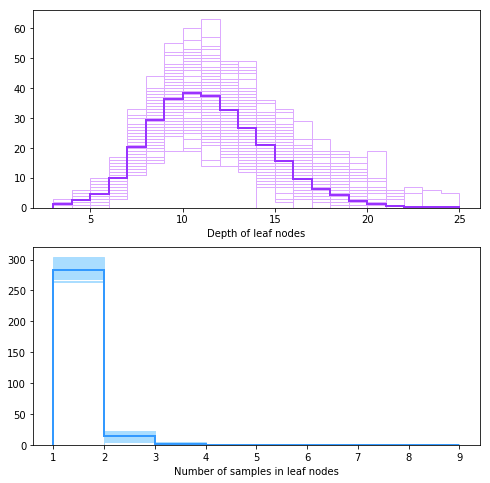

0

In [45]:
# Or, plot everything and its mum
draw_ensemble(ensemble)

In [49]:
# For plotting a single tree structure.
# Note, needs graphviz installed on host machine to perform format conversion at end.
# I have no idea what graphviz is!
# WARNING - If tree is complex will produce a f**king huge image!

export_graphviz(ensemble.estimators_[0],
                filled=True,
                rounded=True)

os.system('dot -Tpng tree.dot -o tree.png')

/usr/lib/python3/dist-packages/sklearn/tree/export.py:386: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


0